<a href="https://colab.research.google.com/github/shinnew9/Apziva-Projects/blob/main/TermDepositMarketing/Project2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00


In [ ]:
import os
import random

# Warnings
import warnings
warnings.filterwarnings("ignore")

# EDA
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Models
# from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# from collections import Counter

# 2nd layer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from imblearn.over_sampling import SMOTE  # We use imbalanced-learn library.
from imblearn.combine import SMOTETomek,SMOTEENN
from imblearn.under_sampling import TomekLinks

# Applying OpTuna
# import optuna

# 3rd layer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap


# Validation
from sklearn.metrics import recall_score, classification_report, confusion_matrix, accuracy_score, precision_score, f1_score, fbeta_score

In [ ]:
# Read dataset
df = pd.read_csv('/content/drive/MyDrive/Apziva/TermDepositMarketing/term-deposit-marketing-2020.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


## Models - 3 layers

1. 1st Layer: A layer to predict which of the potential customers we should make calls to (haven't make any calls yet,can't use any call-related features like duration, campaign, month of the call and etc).
2. 2nd Layer: A layer to predict which of the customers we should keep calling to. This means calls have already been made, I can use call-related data, to predict which of the customers we should keep making calls to. (precision for class 1)

They do not directly affect each other
3. 3rd Layer: Train both with the unsupervised model, to understand who those customers are and filtered the non-subscribers. The goal is to segment the subscribers.

In [ ]:
seed = random.randint(1000, 9999)
print(seed)

9843


In [ ]:
df_copy = df.copy()
df_copy

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


### Train_test_split for Layer2

In [ ]:
for col in df.columns:
  print(col, df[col].unique())
  df_copy[col] = pd.factorize(df_copy[col])[0]
# df_copy

X2 = df_copy.drop(columns=['y'])   # The entire dataset is required so just drop Y.
# X2
y2 = df_copy['y']
y2

age [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital ['married' 'single' 'divorced']
education ['tertiary' 'secondary' 'unknown' 'primary']
default ['no' 'yes']
balance [  2143     29      2 ...   7222   3402 102127]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration [ 261  151   76 ... 1880 1460 2219]
campaign [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]


,y
0,0
1,0
2,0
3,0
4,0
...,...
39995,0
39996,1
39997,1
39998,0


In [ ]:
# Split the dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=seed)

In [ ]:
# X2_train is the entire dataset - should I apply the whole df for training
X2_train2 = X2_train[['contact', 'day', 'month', 'duration', 'campaign']]   # these are the campaign related features.
X2_train2

# X2_train2 is the df that only extracts campaign related featuers

,contact,day,month,duration,campaign
37101,1,6,0,312,0
21441,1,24,3,199,2
3706,0,9,0,139,0
38698,1,8,0,205,2
6152,0,15,0,329,0
...,...,...,...,...,...
25701,1,10,5,768,0
15630,1,12,2,335,0
8397,0,20,1,530,3
18653,1,30,2,422,1


### Reusing the train_test_split from Layer 1

In [ ]:
X = df_copy.drop(columns=['y'])  #Q1. I remove the call-related features, are these correct? The dtypes of each of them are objects and
y2 = df_copy['y']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
# print(categorical_columns)
# print(X1)

# Encode categorical features
label_encoder = LabelEncoder()
# print(label_encoder)

In [ ]:
# Split the dataset
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.3, random_state=seed)

In [ ]:
# y2_train
y2_test

,y
25566,0
34549,0
14967,0
6947,0
2257,0
...,...
26601,0
7330,0
27095,0
3262,0


In [ ]:
# X1_train_rus
y2_train = y2_train.replace({'no':0, 'yes':1}, inplace=False)
y2_test = y2_test.replace({'no':0, 'yes':1}, inplace=False)

### 2nd Layer: to predict which of the customers we should keep calling to <br>
Few tips to do: <br>
- Utilize the entire dataset with the complete set of all features. (Start from scratch) <br>
- Campaign related features: <br>
predict which of the customers we should keep calling, assuming initial round of calls have already made been -> campaign related features <br>

Similar to the previous steps: start with experimenting few different models.
Maybe try RandomUnderSampler, because it worked well and then experiment with few different models. <br>

This time, the goal is different, predicting which of the customer we should keep calling. Precision for class 1. (which of them precised correctly)

#### Data - RandomUnderSampler


|Data|Model||
|------|---|---|
|RUS (RandomUnderSampler)|RandomForestClassifier|
| |XGBClassifier|
| |SGDClassifier|
| |SVC|
| |LGBMClassifier|
| |DecisionTreeClassifier|
| |Perceptron|



Techniques used in here:
1. RandomForestClassifier / XGBClassifier / SGDClassifier / SVC / LGBMClassifier/ DecisionTreeClassifier / Perceptron
2. SMOTE
3. SMOTE-Tomek
4. SMOTEEN

#### Efficient Code for RandUnderSampler

In [ ]:
# Define a function to train and evaluate different models with different samplers
def train_and_evaluate_ru_models(X_train, y_train, X_test, y_test, sampler, sampler_name, classifier, classifier_name):
    # Resample the training data
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    print(f"{sampler_name} - Class Distribution After Resampling:\n{y_resampled.value_counts()}\n")

    # Train the model
    model = classifier
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"{sampler_name} with {classifier_name} - Classification Report:\n", classification_report(y_test, y_pred))
    fhalf_score = fbeta_score(y_test, y_pred, beta=0.5)
    f2_score = fbeta_score(y_test, y_pred, beta=2)
    print(f"{sampler_name} with {classifier_name} - F0.5 Score: {fhalf_score}")
    print(f"{sampler_name} with {classifier_name} - F2 Score: {f2_score}\n")

# List of classifiers to test
classifiers = [
    (RandomForestClassifier(random_state=seed), "RandomForestClassifier"),
    (XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss'), "XGBClassifier"),
    (SGDClassifier(random_state=seed), "SGDClassifier"),
    (SVC(random_state=seed), "SVC"),
    (LGBMClassifier(random_state=seed), "LGBMClassifier"),
    (DecisionTreeClassifier(random_state=seed), "DecisionTreeClassifier"),
    (Perceptron(random_state=seed), "Perceptron")
]

# List of resampling techniques to apply
samplers = [
    (RandomUnderSampler(sampling_strategy='majority', random_state=seed), "RandomUnderSampler"),
    (SMOTE(sampling_strategy='minority', random_state=seed), "SMOTE"),
    (SMOTETomek(sampling_strategy='minority', random_state=seed), "SMOTE-Tomek"),
    (SMOTEENN(sampling_strategy='minority', random_state=seed), "SMOTE-ENN")
]

# Run the training and evaluation for each combination of sampler and classifier
for sampler, sampler_name in samplers:
    for classifier, classifier_name in classifiers:
        train_and_evaluate_ru_models(X2_train, y2_train, X2_test, y2_test, sampler, sampler_name, classifier, classifier_name)


RandomUnderSampler - Class Distribution After Resampling:
y
0    2052
1    2052
Name: count, dtype: int64

RandomUnderSampler with RandomForestClassifier - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.83      0.90     11156
           1       0.25      0.79      0.39       844

    accuracy                           0.82     12000
   macro avg       0.62      0.81      0.64     12000
weighted avg       0.93      0.82      0.86     12000

RandomUnderSampler with RandomForestClassifier - F0.5 Score: 0.29494878134934654
RandomUnderSampler with RandomForestClassifier - F2 Score: 0.5570380253502335

RandomUnderSampler - Class Distribution After Resampling:
y
0    2052
1    2052
Name: count, dtype: int64

RandomUnderSampler with XGBClassifier - Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.81      0.89     11156
           1       0.24      0.80      0.37       844

#### Applying Ensemble for RUS

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, make_scorer, fbeta_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


# Define the ensemble models to use in VotingClassifier
classifiers = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gb', GradientBoostingClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),  # Setting probability=True for voting
    ('logreg', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42))
]

# Define the VotingClassifier for soft voting
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Evaluation function to calculate F0.5, F1, and F2 scores
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X2_train, y2_train)
    y2_pred = model.predict(X2_test)
    print(classification_report(y2_test, y2_pred, target_names=['Non-subscriber', 'Subscriber']))

    # F0.5, F1, and F2 scores
    f0_5 = fbeta_score(y2_test, y2_pred, beta=0.5)
    f1 = fbeta_score(y2_test, y2_pred, beta=1.0)
    f2 = fbeta_score(y2_test, y2_pred, beta=2.0)

    print(f'F0.5 Score: {f0_5}')
    print(f'F1 Score: {f1}')
    print(f'F2 Score: {f2}')

# Apply each resampling technique with the VotingClassifier
resamplers = {
    "RandomUnderSampler": RandomUnderSampler(sampling_strategy='majority', random_state=seed),
    "RandomOverSampler": RandomOverSampler(sampling_strategy='minority', random_state=seed),
    "SMOTEENN": SMOTEENN(sampling_strategy='auto', random_state=seed)
}

for resampler_name, resampler in resamplers.items():
    print(f"\n--- Evaluating with {resampler_name} ---")

    # Define pipeline for resampling and scaling
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('resampler', resampler),
        ('classifier', voting_clf)
    ])

    # Train and evaluate using cross-validation
    scores = cross_val_score(pipeline, X2_train, y2_train, cv=5, scoring=make_scorer(fbeta_score, beta=1))
    print(f"Cross-validated F1 scores with {resampler_name}: {scores}")
    print(f"Average F1 score with {resampler_name}: {np.mean(scores)}")

    # Final evaluation on the test set
    print(f"Evaluation with {resampler_name} on the test set:")
    evaluate_model(pipeline, X2_train, y2_train, X2_test, y2_test)



--- Evaluating with RandomUnderSampler ---
Cross-validated F1 scores with RandomUnderSampler: [0.35942029 0.37658752 0.36006924 0.37315131 0.36093661]
Average F1 score with RandomUnderSampler: 0.3660329941209854
Evaluation with RandomUnderSampler on the test set:
                precision    recall  f1-score   support

Non-subscriber       0.98      0.81      0.89     11156
    Subscriber       0.24      0.79      0.37       844

      accuracy                           0.81     12000
     macro avg       0.61      0.80      0.63     12000
  weighted avg       0.93      0.81      0.85     12000

F0.5 Score: 0.2817379497623897
F1 Score: 0.37105336686225204
F2 Score: 0.5432826051382752

--- Evaluating with RandomOverSampler ---
Cross-validated F1 scores with RandomOverSampler: [0.46052632 0.49431818 0.45539033 0.48       0.44365572]
Average F1 score with RandomOverSampler: 0.466778111067795
Evaluation with RandomOverSampler on the test set:
                precision    recall  f1-score 

#### Data - RandomOverSampler


|Data|Model||
|------|---|---|
|RUS (RandomUnderSampler)|RandomForestClassifier|
| |XGBClassifier|
| |SGDClassifier|
| |SVC|
| |LGBMClassifier|
| |DecisionTreeClassifier|


Techniques used in here:
1. RandomForestClassifier / XGBClassifier / SGDClassifier / SVC / LGBMClassifier/ DecisionTreeClassifier
2. SMOTE
3. SMOTE-Tomek
4. SMOTEEN

#### Efficient Code for RandOverSampler

In [ ]:
# Define a function to train and evaluate different models with different samplers
def train_and_evaluate_ro_models(X_train, y_train, X_test, y_test, sampler, sampler_name, classifier, classifier_name):
    # Resample the training data
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    print(f"{sampler_name} - Class Distribution After Resampling:\n{y_resampled.value_counts()}\n")

    # Train the model
    model = classifier
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print(f"{sampler_name} with {classifier_name} - Classification Report:\n", classification_report(y_test, y_pred))
    fhalf_score = fbeta_score(y_test, y_pred, beta=0.5)
    f2_score = fbeta_score(y_test, y_pred, beta=2)
    print(f"{sampler_name} with {classifier_name} - F0.5 Score: {fhalf_score}")
    print(f"{sampler_name} with {classifier_name} - F2 Score: {f2_score}\n")

# List of classifiers to test
classifiers = [
    (RandomForestClassifier(random_state=seed), "RandomForestClassifier"),
    (XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='mlogloss'), "XGBClassifier"),
    (SGDClassifier(random_state=seed), "SGDClassifier"),
    (SVC(random_state=seed), "SVC"),
    (LGBMClassifier(random_state=seed), "LGBMClassifier"),
    (DecisionTreeClassifier(random_state=seed), "DecisionTreeClassifier"),
    (Perceptron(random_state=seed), "Perceptron")
]

# List of resampling techniques to apply
samplers = [
    (RandomOverSampler(sampling_strategy='minority', random_state=seed), "RandomOverSampler"),
    (SMOTE(sampling_strategy='minority', random_state=seed), "SMOTE"),
    (SMOTETomek(sampling_strategy='minority', random_state=seed), "SMOTE-Tomek"),
    (SMOTEENN(sampling_strategy='minority', random_state=seed), "SMOTE-ENN")
]

# Run the training and evaluation for each combination of sampler and classifier
for sampler, sampler_name in samplers:
    for classifier, classifier_name in classifiers:
        train_and_evaluate_ro_models(X2_train, y2_train, X2_test, y2_test, sampler, sampler_name, classifier, classifier_name)


RandomOverSampler - Class Distribution After Resampling:
y
0    25948
1    25948
Name: count, dtype: int64

RandomOverSampler with RandomForestClassifier - Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     11156
           1       0.49      0.29      0.37       844

    accuracy                           0.93     12000
   macro avg       0.72      0.64      0.66     12000
weighted avg       0.92      0.93      0.92     12000

RandomOverSampler with RandomForestClassifier - F0.5 Score: 0.4305555555555556
RandomOverSampler with RandomForestClassifier - F2 Score: 0.31917631917631917

RandomOverSampler - Class Distribution After Resampling:
y
0    25948
1    25948
Name: count, dtype: int64

RandomOverSampler with XGBClassifier - Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94     11156
           1       0.35      0.61      0.44       844



### Applying OpTuna on SVC

In [ ]:
# import optuna
# from optuna import Trial
# from optuna.samplers import TPESampler
from sklearn.metrics import make_scorer

# Define an objective function for Optuna to optimize the classifier's hyperparameters
def objective(trial, X_train, y_train, X_test, y_test, sampler, sampler_name, classifier_name):
    # Apply the resampler to the training data
    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)
    print(f"{sampler_name} - Class Distribution After Resampling:\n{y_resampled.value_counts()}\n")

    # Suggest hyperparameters for each classifier based on its name
    if classifier_name == "RandomForestClassifier":
        n_estimators = trial.suggest_int('n_estimators', 50, 300)
        max_depth = trial.suggest_int('max_depth', 5, 30)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=seed)

    elif classifier_name == "XGBClassifier":
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
        max_depth = trial.suggest_int('max_depth', 3, 15)
        model = XGBClassifier(learning_rate=learning_rate, max_depth=max_depth, random_state=seed, use_label_encoder=False, eval_metric='mlogloss')

    elif classifier_name == "SGDClassifier":
        alpha = trial.suggest_loguniform('alpha', 1e-4, 1e-1)
        max_iter = trial.suggest_int('max_iter', 500, 2000)
        model = SGDClassifier(alpha=alpha, max_iter=max_iter, random_state=seed)

    elif classifier_name == "SVC":
        C = trial.suggest_loguniform('C', 1e-3, 1e2)
        gamma = trial.suggest_loguniform('gamma', 1e-4, 1e-1)
        model = SVC(C=C, gamma=gamma, probability=True, random_state=seed)

    elif classifier_name == "LGBMClassifier":
        num_leaves = trial.suggest_int('num_leaves', 20, 50)
        learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
        model = LGBMClassifier(num_leaves=num_leaves, learning_rate=learning_rate, random_state=seed)

    elif classifier_name == "DecisionTreeClassifier":
        max_depth = trial.suggest_int('max_depth', 3, 20)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
        model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=seed)

    elif classifier_name == "Perceptron":
        alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
        max_iter = trial.suggest_int('max_iter', 500, 2000)
        model = Perceptron(alpha=alpha, max_iter=max_iter, random_state=seed)

    # Train the model
    model.fit(X_resampled, y_resampled)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate and return F1 score for Optuna optimization
    f1 = fbeta_score(y_test, y_pred, beta=1)
    return f1

# Run Optuna for each classifier with each resampler
for sampler, sampler_name in samplers:
    for classifier, classifier_name in classifiers:
        print(f"Optimizing {classifier_name} with {sampler_name}...")
        study = optuna.create_study(direction='maximize', sampler=TPESampler())
        study.optimize(lambda trial: objective(trial, X2_train, y2_train, X2_test, y2_test, sampler, sampler_name, classifier_name), n_trials=50)

        # Print best trial results
        print(f"Best trial for {classifier_name} with {sampler_name}:")
        print(f"  F1 Score: {study.best_trial.value}")
        print(f"  Best Parameters: {study.best_params}\n")

### 3rd Layer: Training, help the company understand who those customers are

- do not use standardscaler, because I will loose interpretability (hard to understand the values)
- try to print out average / median for each clusters,
features I will be print out would be age, durations, jobs for these customers.
- filter out non subscribers and only work with subscribers
- unsupversied training K-means and hierarchical clustering to identify customer segments, only the subscribers
- After I finish K-means and h clusters dimensionality reduction techniques PCA, TSNE, U-Map (just for the visualization purposes) for 2d and 3d


3. 3rd layer: unsupervised learning : K-means, and hierarchical clustering (these are clustering, only apply to subscribers) to filter out non-subscribers, because I want to do customer segmentation
3rd part: visualize and apply different unsupervised techniques, such as PCA, TSNE, UMAP, and then finalize everything



#### K-Means and PCA

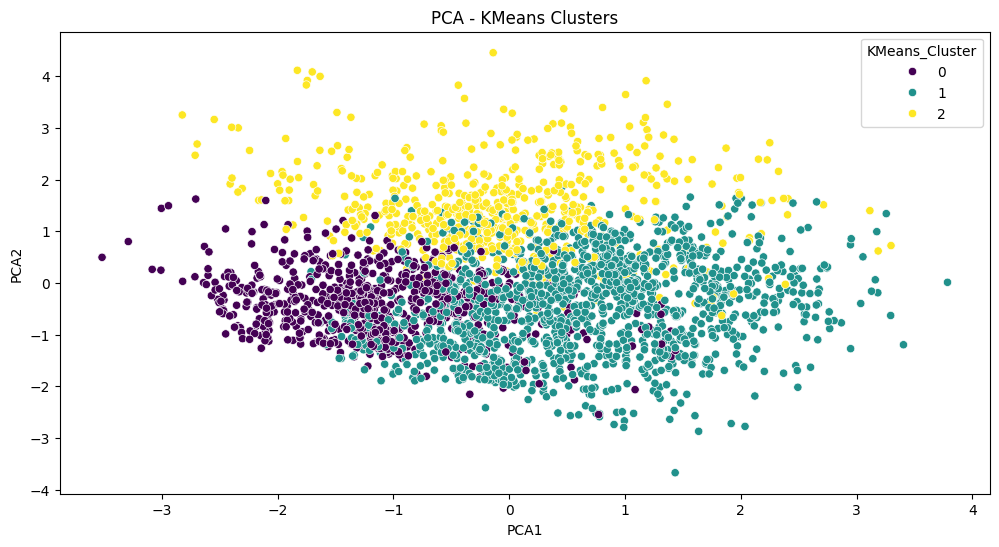

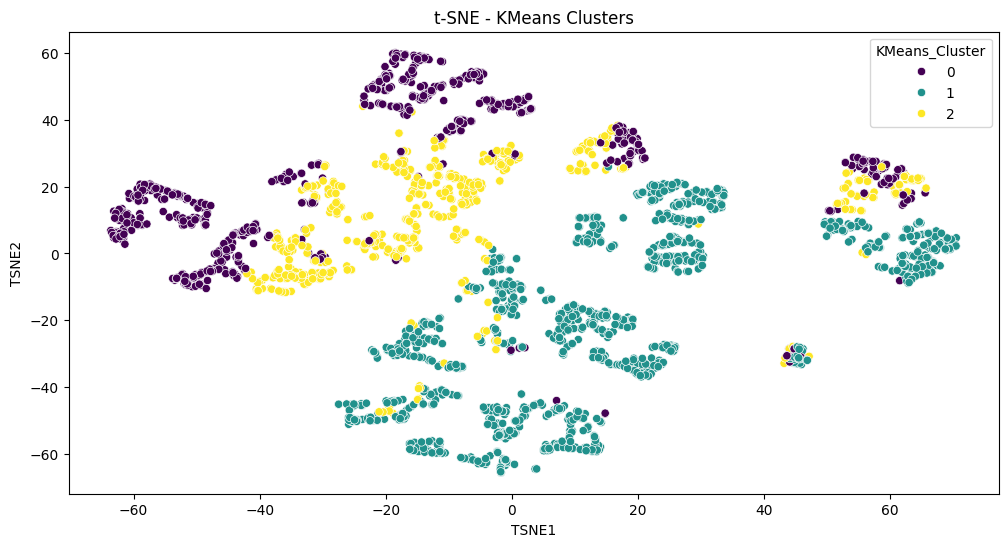

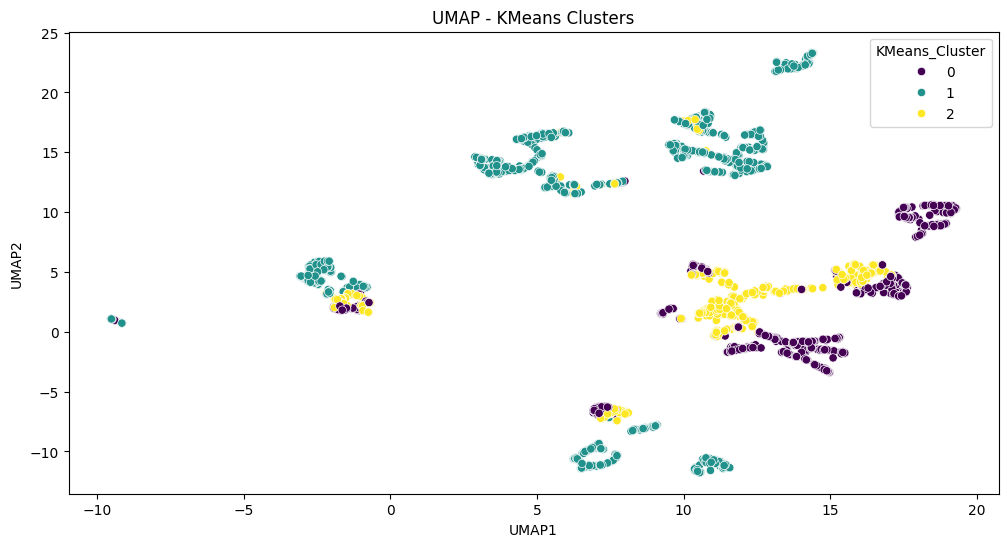

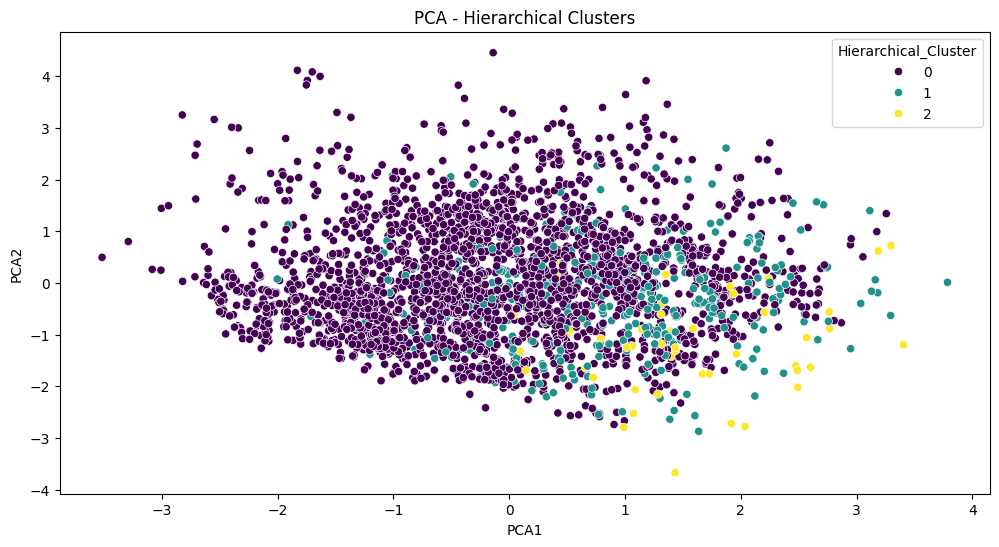

In [ ]:
# Filter the data to include only subscribers
subscribers_data = df_copy[df_copy['y'] == 1]  # Assuming 'y' is the column indicating subscription status

# Select relevant features for clustering
clustering_features = subscribers_data.drop(columns=['y', 'duration', 'campaign', 'day', 'month'], errors='ignore')

# Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
subscribers_data['KMeans_Cluster'] = kmeans.fit_predict(scaled_features)

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
subscribers_data['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_features)

# Visualize with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
subscribers_data['PCA1'] = pca_result[:, 0]
subscribers_data['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='KMeans_Cluster', data=subscribers_data, palette='viridis')
plt.title('PCA - KMeans Clusters')
plt.show()

# Visualize with t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)
subscribers_data['TSNE1'] = tsne_result[:, 0]
subscribers_data['TSNE2'] = tsne_result[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='KMeans_Cluster', data=subscribers_data, palette='viridis')
plt.title('t-SNE - KMeans Clusters')
plt.show()

# Visualize with UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_reducer.fit_transform(scaled_features)
subscribers_data['UMAP1'] = umap_result[:, 0]
subscribers_data['UMAP2'] = umap_result[:, 1]

plt.figure(figsize=(12, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='KMeans_Cluster', data=subscribers_data, palette='viridis')
plt.title('UMAP - KMeans Clusters')
plt.show()

# Visualize with Hierarchical Clustering (optional)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Hierarchical_Cluster', data=subscribers_data, palette='viridis')
plt.title('PCA - Hierarchical Clusters')
plt.show()

In [ ]:
# Step1: Filter the data to include only subscribers.
subscribers_data = df_copy[df_copy['y']==1]  # Assuming 'y' is the column indicating subscribers
# subscribers_data  # 2896


# Step 2: Select relevant features for clustering
# Exclude 'y' and other call-related features like 'duration', 'campaign', etc.
clustering_features = subscribers_data.drop(columns=['y', 'duration', 'campaign', 'day', 'month'])
# clustering_features  # 2896


# Step 3: Scale the data

# Step 4: Apply KMeans Clustering
# Determine optimal number of clusters using the elbow method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=seed)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters (e.g., 3) based on the elbow plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=seed)
subscribers_data['Cluster'] = kmeans.fit_predict(scaled_features)


# Step 5: Analyze and interpret the clusters
# For example, checking the distribution of each cluster:
print(subscribers_data['Cluster'].value_counts())

# Or calculating the mean values of each feature within clusters to understand characteristics:
cluster_mean = subscribers_data.groupby('Cluster').mean()
cluster_median = subscribers_data.groupby('Cluster').median()
# For Ordinal Feature:
# Job/Education etc.. Feature: try to calculate the most common and include that separately unless it makse hard for me to interpret the data
print(cluster_mean)
print(cluster_median)

In [ ]:
# If needed, visualize the clusters using PCA (Principal Component Analysis) for better understanding:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=subscribers_data['Cluster'], cmap='viridis')
plt.title('Customer Segmentation using KMeans')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

#### K-Means

In [ ]:
# Step 1: Filter the data to include only subscribers
subscribers_data = df_copy[df_copy['y'] == 1]  # Assuming 'y' is the column indicating subscription status

# Step 2: Select relevant features for clustering
# Exclude 'y' and other call-related features like 'duration', 'campaign', 'day', 'month'
clustering_features = subscribers_data.drop(columns=['y', 'duration', 'campaign', 'day', 'month'])

# Step 3: Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Step 4: Apply KMeans Clustering
# Determine the optimal number of clusters using the elbow method (optional)
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the number of clusters (e.g., 3) based on the elbow plot
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
subscribers_data['Cluster'] = kmeans.fit_predict(scaled_features)

# Step 5: Analyze and interpret the clusters
print(subscribers_data['Cluster'].value_counts())

# Calculate the mean values of each feature within clusters to understand characteristics
cluster_summary = subscribers_data.groupby('Cluster').mean()
print(cluster_summary)

#### Hierarhical Clustering

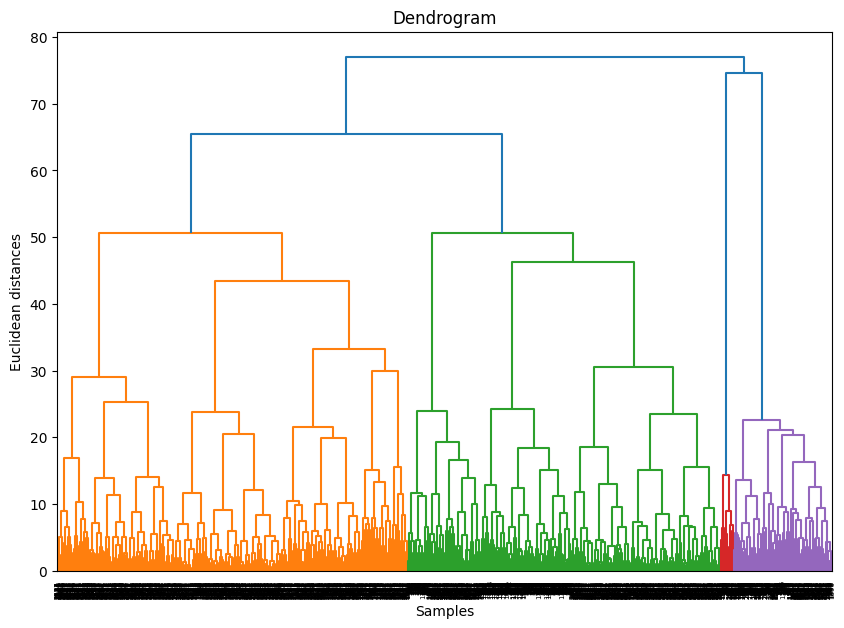

Cluster
0    2482
1     365
2      49
Name: count, dtype: int64
               age       job   marital  education  default      balance  \
Cluster                                                                   
0        19.705479  3.487913  0.622482   0.904512      0.0  2012.413779   
1        18.756164  3.452055  0.619178   1.021918      0.0  1538.832877   
2        19.979592  3.020408  0.775510   1.040816      1.0  1641.673469   

          housing      loan   contact        day     month    duration  \
Cluster                                                                  
0        0.506849  0.000000  0.890411  14.031023  4.031426  647.973811   
1        0.416438  1.000000  0.876712  12.912329  2.764384  799.421918   
2        0.448980  0.306122  0.714286  12.734694  3.142857  719.489796   

         campaign    y  
Cluster                 
0        1.490330  1.0  
1        1.454795  1.0  
2        1.142857  1.0  


In [ ]:
# Step 1: Filter the data to include only subscribers
subscribers_data = df_copy[df_copy['y'] == 1]  # Assuming 'y' is the column indicating subscription status

# Step 2: Select relevant features for clustering
# Exclude 'y' and other call-related features like 'duration', 'campaign', 'day', 'month'
clustering_features = subscribers_data.drop(columns=['y', 'duration', 'campaign', 'day', 'month'])

# Step 3: Scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_features)

# Step 4: Apply Hierarchical Clustering
# Create the linkage matrix using 'ward' method
linked = linkage(scaled_features, method='ward')

# Plot the dendrogram to determine the optimal number of clusters
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Cut the dendrogram at a point to define clusters, e.g., 3 clusters
optimal_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
subscribers_data['Cluster'] = hierarchical.fit_predict(scaled_features)

# Step 5: Analyze and interpret the clusters
print(subscribers_data['Cluster'].value_counts())
# But I don't know what each values means

# Calculate the mean values of each feature within clusters to understand characteristics
cluster_summary = subscribers_data.groupby('Cluster').mean()
print(cluster_summary)

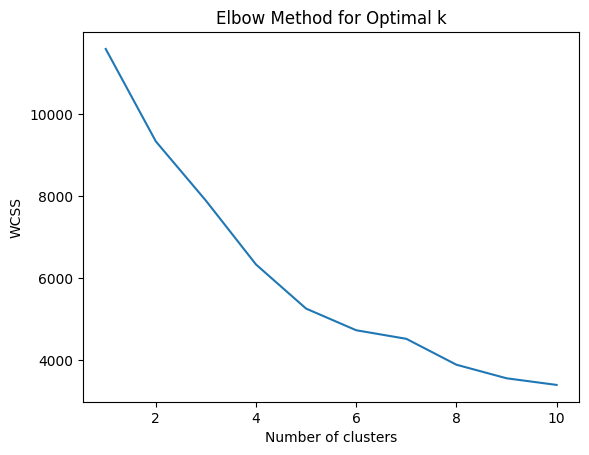

               age      balance    duration  campaign
cluster                                              
0        19.564637   889.425214  664.426282  0.821047
1        19.722908  4808.844993  583.989026  1.032922
2        19.427119  1580.593220  900.952542  6.766102


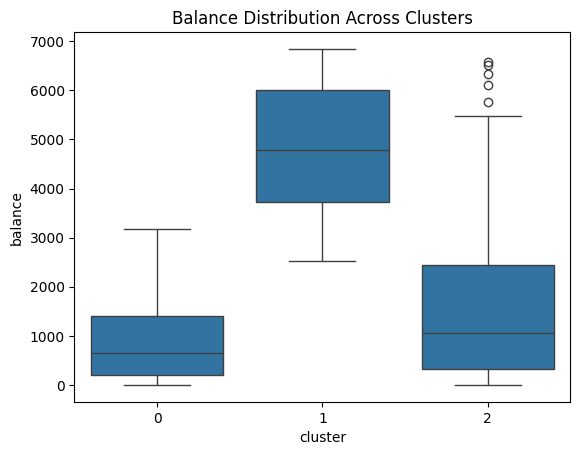

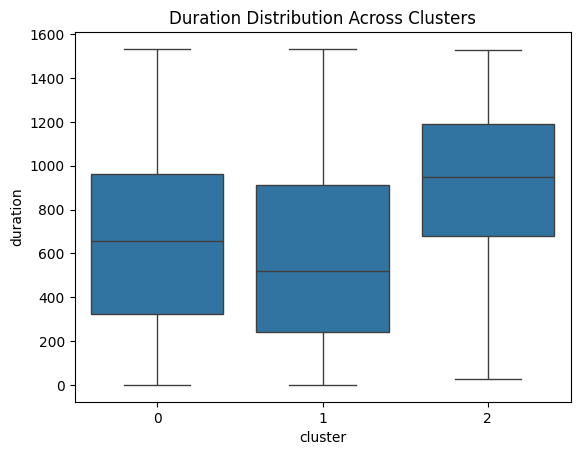

In [ ]:
# Step 1: Filter out non-subscribers (only keep customers who have purchased the product)
subscribers_df = df_copy[df_copy['y'] == 1]

# Step 2: Select features for clustering (you can adjust these based on relevance)
features = ['age', 'balance', 'duration', 'campaign']  # Example features
X = subscribers_df[features]

# Step 3: Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Step 4: Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Step 5: Apply K-means with the chosen number of clusters (e.g., k=3 based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
subscribers_df['cluster'] = kmeans.fit_predict(scaled_features)

# Step 6: Analyze the clusters
# Get the mean values of each feature for each cluster to understand their characteristics
cluster_summary = subscribers_df.groupby('cluster')[features].mean()
print(cluster_summary)

# Step 7: Visualize the segments
# This can be done using bar plots, scatter plots, etc.
# For example, to see how 'balance' and 'duration' differ across clusters:
sns.boxplot(x='cluster', y='balance', data=subscribers_df)
plt.title('Balance Distribution Across Clusters')
plt.show()

sns.boxplot(x='cluster', y='duration', data=subscribers_df)
plt.title('Duration Distribution Across Clusters')
plt.show()

# 1. Cluster 0:
# Median Balance: The median balance is relatively low compared to the other clusters.
# Balance Range: The interquartile range (IQR) is small, indicating less variability in balances within this cluster.
# Potential Insight: Customers in this cluster have lower balances, which could mean they might be less likely to invest large amounts or prefer smaller deposits. They might need more encouragement to invest.

# 2. Cluster 1:
# Median Balance: The median balance is the highest among all clusters.
# Balance Range: The IQR is wider, meaning there's a larger spread of balances among customers in this cluster. The balance is generally high.
# Potential Insight: This cluster represents customers with higher balances, which makes them potentially valuable targets for investment products. They might have more disposable income and could be more willing to invest in higher-value products.

# 3. Cluster 2:
# Median Balance: This cluster has a median balance between Cluster 0 and Cluster 1.
# Balance Range: There is a moderate spread in the balances, with some outliers on the higher end.
# Potential Insight: Customers in this cluster have moderate balances but could have a few individuals who are potentially high-value investors. They might be interested in products with medium-term returns or might need targeted offers to convert.